### July 14th Riddler Express: Can You Eat More Pizza Than Your Siblings?
***

The July 14th Riddler Express from [FiveThirtyEight](https://fivethirtyeight.com/features/can-you-eat-more-pizza-than-your-siblings/) is as follows: 

> You and your two older siblings are sharing two extra-large pizzas and decide to cut them in an unusual way. You overlap the pizzas so that the crust of one touches the center of the other (and vice versa since they are the same size). You then slice both pizzas around the area of overlap. Two of you will each get one of the crescent-shaped pieces, and the third will get both of the football-shaped cutouts.

> Which should you choose to get more pizza: one crescent or two footballs?

OK, let's get a lay of the land by sketching a picture. I think we can agree that the actual size of the pizzas does not matter, so we will make our pizzas dimensionless.  

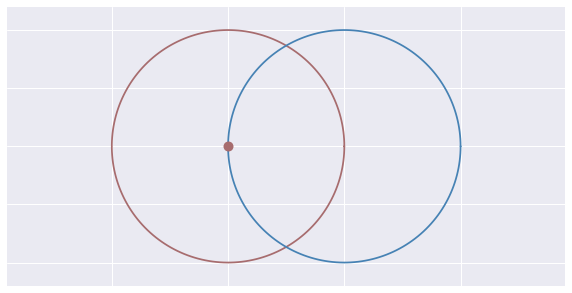

In [138]:
plotPizzas()

There are really only two possibilities of winners and losers in this scenario.  Either the two people with the crescent shaped slices come out ahead or the person with the doubled-up football piece does.  

Certainly it must be true that if the football piece makes up more than $\frac{1}{3}$ of a single pie then the person getting TWO football pieces will be the winner.   To see this, let $x_{cres}$ and $x_{foot}$ be the **proportions** of the crescent and football pieces of the pie, respectively, and note that $x_{cres} = 1-x_{foot}$.   Then note that 

$$
\textrm{if } x_{foot} > \frac{1}{3} \quad \textrm{then} \quad x_{cres} = 1-x_{foot} < \frac{2}{3}  \quad \textrm{and so} \quad 2~x_{foot} > \frac{2}{3} > x_{cres} 
$$

So now the question becomes simply: Does the football piece of the pie make up more than $\frac{1}{3}$ of the total pie?  

In fact it **does** and it's fairly easy to check just by drawing a picture. 

Let's mark out $\frac{1}{3}$ of the area of the pie in a simple way and see if it fits inside the football cut-out.  A simple way to mark out $\frac{1}{3}$ of a circle is to divide the circle into sectors.  Since there are $2\pi$ radians in a circle we need to carve out a sector spanning $\frac{2\pi}{3}$ radians to get $\frac{1}{3}$ of the area.  If we do this for $-\frac{\pi}{3} \leq \theta \leq \frac{\pi}{3}$ then the sector will fit nicely in our football cut-out. 

Here's the picture: 

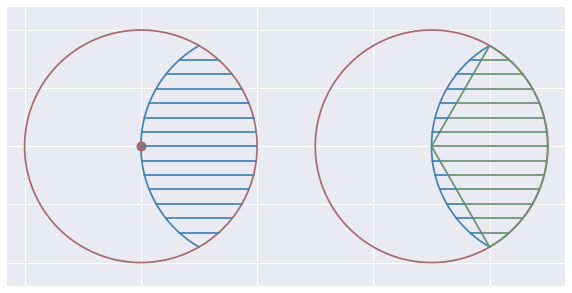

In [137]:
plotThirds()

From the picture it is clear that the football piece makes up more than $\frac{1}{3}$ of the pie, and thus choosing to take the **TWO** football pieces will net you the bigger dinner. 

If we want to be a bit more careful we can use calculus to exactly compute the fraction of the pie made up from the football piece.  To make life easier, we'll assume that the radius of the pie is $1$, and then compute the desired fraction at the end.  

No matter how you go about it, the integral required to compute the area of the football slice is a bit difficult.  I will do it by first noticing that the slice is symmetric about the line $x = \frac{1}{2}$, so I can integrate over the region with $x > \frac{1}{2}$ and multiply by 2. 

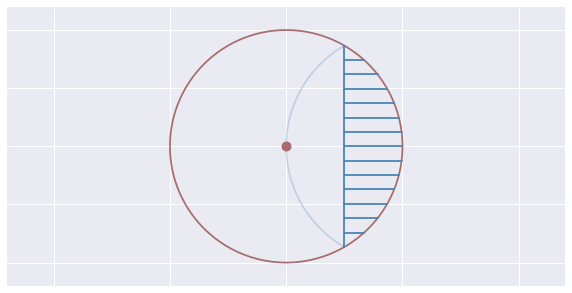

In [177]:
plotIntegral()

We then carry out the integral in polar coordinates.  Note that the equation of the circle is $r=1$ and the equation of the line $x=\frac{1}{2}$ is $r = \frac{1}{2}\sec(\theta)$.  The integral for the area (remembering to multiply by 2) is then 

$$
\texttt{Area} = 2\int_{-\pi/3}^{\pi/3} \int_{\sec(\theta)/2}^1 r ~dr ~d\theta 
= \int_{-\pi/3}^{\pi/3} 1-\frac{1}{4}\sec^2(\theta) ~d\theta = \frac{2\pi}{3} - \frac{\sqrt{3}}{2} \approx 1.228 
$$

Now, compared to the total area of the pie this is 

$$
\frac{\texttt{Area}}{\pi} = \frac{\dfrac{2\pi}{3} - \dfrac{\sqrt{3}}{2}}{\pi} \approx 0.391 > \frac{1}{3}
$$

So, we have carefully confirmed that the football shaped piece of the pie makes up more than $\frac{1}{3}$ of the total area of the pie, and thus a person taking **TWO football slices** will get the larger amount of pizza overall. 

<br><br><br><br>
<br><br><br><br>

### Helper Functions
***

In [175]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}

def plotPizzas():
    theta = np.linspace(0,2*np.pi,200)
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111) 
    plt.plot(np.cos(theta), np.sin(theta), color=mycolors["red"])
    plt.plot(np.cos(theta)+1.0, np.sin(theta), color=mycolors["blue"])
    plt.plot([0], [0], color=mycolors["red"], marker="o", markersize=10)
    plt.xlim([-1.25,1.25])
    plt.axis("equal")
    plt.margins(0.1)
    plt.grid(True)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    
def plotThirds():
    theta = np.linspace(0,2*np.pi,200)
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111) 
    plt.plot(np.cos(theta), np.sin(theta), color=mycolors["red"])
    plt.plot(np.cos(theta)+2.5, np.sin(theta), color=mycolors["red"])
    theta = np.linspace(np.pi-np.pi/3,np.pi+np.pi/3,200)
    plt.plot(np.cos(theta)+1.0, np.sin(theta), color=mycolors["blue"])
    plt.plot(np.cos(theta)+3.5, np.sin(theta), color=mycolors["blue"])
    plt.plot([0], [0], color=mycolors["red"], marker="o", markersize=10)
    plt.xlim([-1,1])
    plt.axis("equal")
    plt.margins(0.1)
    plt.grid(True)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    
    plt.plot([0+2.5,1.0*np.cos(np.pi/3)+2.5], [0, 1.0*np.sin(np.pi/3)], color=mycolors["green"])
    plt.plot([0+2.5,1.0*np.cos(np.pi/3)+2.5], [0,-1.0*np.sin(np.pi/3)], color=mycolors["green"])
    theta = np.linspace(-np.pi/3,np.pi/3,200)
    plt.plot(np.cos(theta)+2.5, np.sin(theta), color=mycolors["green"])
    for y in np.linspace(-np.sin(np.pi/3), np.sin(np.pi/3), 15): 
        t = np.arcsin(y)
        plt.plot([np.abs(y)/(np.sin(np.pi/3)/np.cos(np.pi/3))+2.5, np.cos(t)+2.5], [y, y], color=mycolors["green"])
        plt.plot([1-np.cos(t)+2.5, np.abs(y)/(np.sin(np.pi/3)/np.cos(np.pi/3))+2.5], [y, y], color=mycolors["blue"])
        plt.plot([1-np.cos(t), np.cos(t)], [y, y], color=mycolors["blue"])
        
def plotIntegral():
    theta = np.linspace(0,2*np.pi,200)
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111) 
    plt.plot(np.cos(theta), np.sin(theta), color=mycolors["red"])
    theta = np.linspace(np.pi-np.pi/3,np.pi+np.pi/3,200)
    plt.plot(np.cos(theta)+1.0, np.sin(theta), color=mycolors["blue"], alpha=0.25)
    plt.plot([.5,.5], [np.sin(np.pi/3),-np.sin(np.pi/3)], color=mycolors["blue"])
    plt.plot([0], [0], color=mycolors["red"], marker="o", markersize=10)
    plt.xlim([-1,1])
    plt.axis("equal")
    plt.margins(0.1)
    plt.grid(True)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    
    theta = np.linspace(-np.pi/3,np.pi/3,200)
    for y in np.linspace(-np.sin(np.pi/3), np.sin(np.pi/3), 15): 
        t = np.arcsin(y)
        plt.plot([.5, np.cos(t)], [y, y], color=mycolors["blue"])